In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
myPal= sns.dark_palette("#50f492", 1000)

__Reading files__

Each file represents a specific experiment. This way, the data are separate by files so that each file stands for an experiment under certain conditions.

In [2]:
#Tilt OFF/ NO inverters
fileName1 = '20190621_1.csv'

#Tilt ON / NO inverters
fileName2 = "20190621_2.csv"

#Tilt ON / YES inverters
fileName3 = "20190621_3.csv"

listFiles = [fileName1,fileName2,fileName3]

In [3]:
#NOW WE CREATE A LIST OF DATAFRAMES. EACH DATA FRAME CONTAINS DATA FROM AN EXPERIMENT.
#WE ALSO CREATE A NEW COLUMN OF TIME (IN SECONDS)
listDatas = []

for k in listFiles:
    listDatas.append(pd.read_csv(k))
for k in listDatas:   
    k['Time'] = k['Hours']*3600 + k['Minutes']*60 + k['Seconds']
    k['Time'] = k['Time'] - k['Time'][0]

__Creating heatmaps for analyzing wavefront-tilt__

Here we're interested in analyzing two cases:
* The number of countings that each detector (D1,D2) measure, separately, at each XY-position;
* The number of countings that both detectors measure simultaneously at each XY-position.

Each case branches into three sub-cases:

* Visualizing the number of countings when there's NO tilt and NO inversion of XY-coordinate;
* Visualizing the number of counting when tilt EXISTS but still there's no inversion of transverse coordinates;
* Visualizing the number of countings when BOTH tilt and inversion of coordinates take place.

As we want to create a single colour bar for labelling our heatmps, we need first to separate the data we'll use in
each visualization so that we can select which number will be at the top edge of the colour bar and which will be at the bottom edge.

In [4]:
#WE START BY CREATING HEATMAPS FOR THE FIRST CASE. AS WE'VE GOT 2 DETECTORS AND 3 SUB-CASES, WE'LL NEED 6 HEATMAPS.
maxToCbar=pd.concat(listDatas[0:])[['C1','C2']].max().max()
minToCbar=pd.concat(listDatas[0:])[['C1','C2']].min().min()

cbarTicks = np.linspace(start=minToCbar,stop=maxToCbar,num=5,dtype=int)

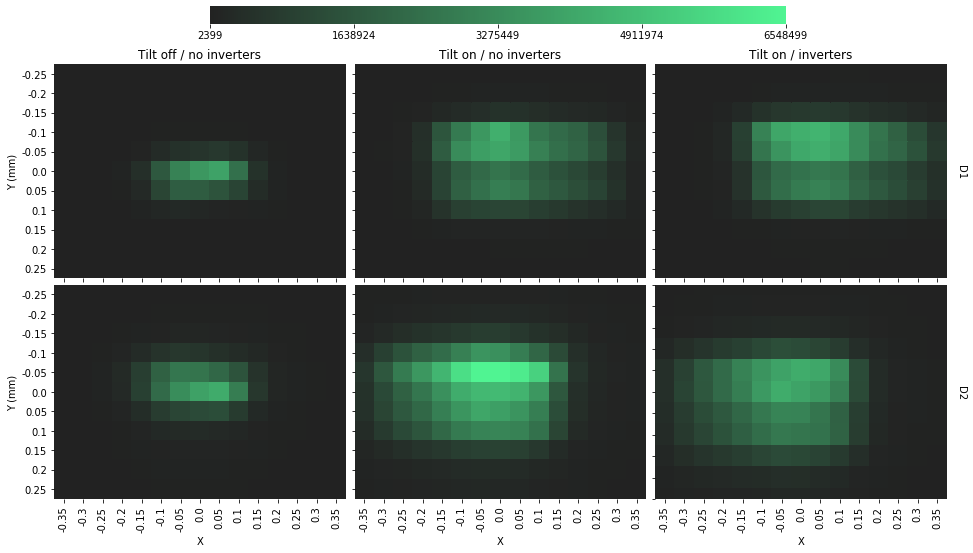

In [5]:
fig, ax = plt.subplots(2,3,figsize=(16,8),sharex=True,sharey=True)
#CREATE AN AXIS FOR THE COLOUR BAR
cbar_ax = fig.add_axes([0.26, 0.95, .5, .03]) 

#ITERATING OVER DATAFRAMES AND CALLING SNS.HEATMAP FOR EACH ONE
for j in [0,1,2]:
    sns.heatmap(listDatas[j].pivot_table(values='C1',index='Y1',columns='X1'), ax=ax[0][j],cbar=False,vmin=minToCbar,vmax=maxToCbar,cmap=myPal)
    sns.heatmap(listDatas[j].pivot_table(values='C2',index='Y2',columns='X2'), ax=ax[1][j],cbar=j==0,vmin=minToCbar,vmax=maxToCbar,
            cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal","ticks":cbarTicks},cmap=myPal, yticklabels=j!=0)

#ADDING LABELS AND TITLES
ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('')
ax[0][1].set_title('Tilt on / no inverters')

ax[0][2].text(1.05, 0.5, 'D1',horizontalalignment='center',verticalalignment='center',rotation=-90,transform=ax[0][2].transAxes)
ax[1][2].text(1.05, 0.5, 'D2',horizontalalignment='center',verticalalignment='center',rotation=-90,transform=ax[1][2].transAxes)

ax[0][0].set_ylabel('Y (mm)')
ax[0][0].set_xlabel('')
ax[0][0].set_title('Tilt off / no inverters')


ax[1][0].set_ylabel('Y (mm)')
ax[1][0].set_xlabel('X')

ax[0][2].set_title('Tilt on / inverters')
ax[0][2].set_xlabel('')
ax[0][2].set_ylabel('')


ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('X')

ax[1][2].set_ylabel('')
ax[1][2].set_xlabel('X')

plt.subplots_adjust(wspace=0.03,hspace=0.03)

In [6]:
#NOW WE CREATE HEATMAPS FOR THE SECOND CASE. VIRTUALLY WE'VE GOT 1 DETECTOR (COINCIDENT COUNTINGS) 
#AND 3 SUB-CASES, WE'LL NEED 3 HEATMAPS.

maxToCbar=pd.concat(listDatas[0:])['Cc'].max()
minToCbar=pd.concat(listDatas[0:])['Cc'].min()

cc1 = listDatas[0].pivot_table(values='Cc',index='Y1',columns='X1')
cc2 = listDatas[1].pivot_table(values='Cc',index='Y1',columns='X1')
cc3 = listDatas[2].pivot_table(values='Cc',index='Y1',columns='X1')
listCc = [cc1,cc2,cc3]

cbarTicks = np.linspace(start=minToCbar,stop=maxToCbar,num=5,dtype=int)

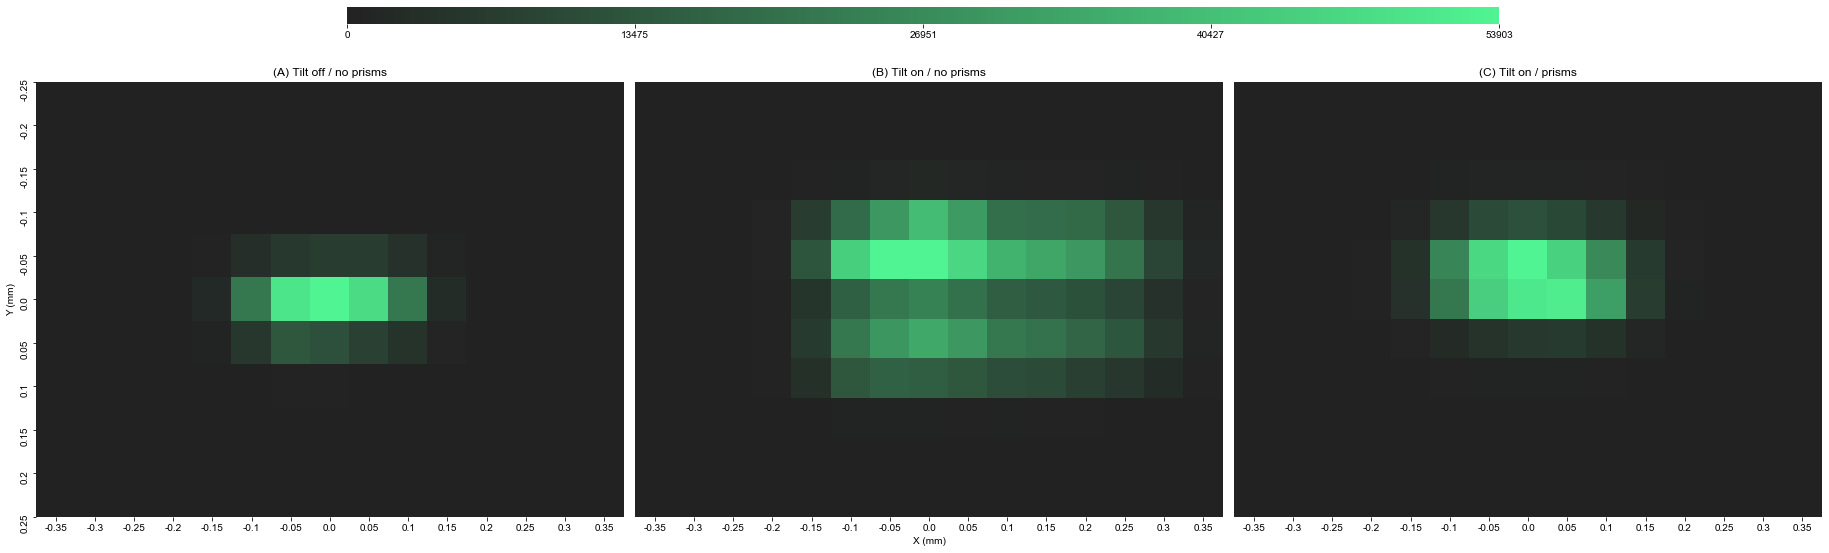

In [7]:
figCc, axCc = plt.subplots(1,3,figsize=(32,8))
cbar_ax = figCc.add_axes([0.26, 0.98, .5, .03])

#ITERATING OVER DATAFRAMES AND CALLING SNS.HEATMAP FOR EACH ONE
for k in [0,1,2]:
    sns.heatmap(listCc[k], cmap=myPal,ax=axCc[k], yticklabels=k==0,cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal","ticks":cbarTicks},cbar=k==0, rasterized=True)

#ADDING LABELS AND TITLES    
axCc[0].set_ylabel('Y (mm)')
axCc[0].set_xlabel('')
axCc[0].set_title('(A) Tilt off / no prisms')

axCc[1].set_ylabel('')
axCc[1].set_xlabel('X (mm)')
axCc[1].set_title('(B) Tilt on / no prisms')


axCc[2].set_ylabel('')
axCc[2].set_xlabel('')
axCc[2].set_title('(C) Tilt on / prisms')
sns.set(font_scale=2.0)
plt.subplots_adjust(wspace=0.02)